In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)              
pd.set_option('display.max_columns', None)          
pd.set_option('display.max_colwidth', 50)           
pd.set_option('display.width', 1000)                 
pd.set_option('display.float_format', '{:.2f}'.format)  
pd.set_option('display.colheader_justify', 'left')  
pd.set_option('display.float_format', '{:,.2f}'.format)
def estilo_minimalista(df):
    return df.style.set_properties(**{
        'font-size': '8px',    
        'border-color': 'black', 
        'border-width': '0.4px',   
        'border-style': 'solid',
        'padding': '1px',        
    })
sns.set_theme(style="white", palette="deep", context="talk",font_scale=0.8)
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df_eventos_preprocessado = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_preprocessado.csv",
    sep=';',
    decimal=',')

df_eventos_preprocessado.head(5)

,Status,DH_MORTOS,DH_FERIDOS,DH_ENFERMOS,DH_DESABRIGADOS,DH_DESALOJADOS,DH_DESAPARECIDOS,DH_OUTROS AFETADOS,DH_total_danos_humanos,DM_Uni Habita Danificadas,DM_Uni Habita Destruidas,DM_Uni Habita Valor,DM_Inst Saúde Danificadas,DM_Inst Saúde Destruidas,DM_Inst Saúde Valor,DM_Inst Ensino Danificadas,DM_Inst Ensino Destruidas,DM_Inst Ensino Valor,DM_Inst Serviços Danificadas,DM_Inst Serviços Destruidas,DM_Inst Serviços Valor,DM_Inst Comuni Danificadas,DM_Inst Comuni Destruidas,DM_Inst Comuni Valor,DM_Obras de Infra Danificadas,DM_Obras de Infra Destruidas,DM_Obras de Infra Valor,DM_total_danos_materiais,PEPL_Assis_méd e emergên(R$),PEPL_Abast de água pot(R$),PEPL_sist de esgotos sanit(R$),PEPL_Sis limp e rec lixo (R$),PEPL_Sis cont pragas (R$),PEPL_distrib energia (R$),PEPL_Telecomunicações (R$),PEPL_Tran loc/reg/l_curso (R$),PEPL_Distrib combustíveis(R$),PEPL_Segurança pública (R$),PEPL_Ensino (R$),PEPL_total_publico,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR,DensidadePop,Hab,Area,Subgrupo_Alagamentos,Subgrupo_Colapso de edificações,Subgrupo_Desastres relacionados à contaminação da água,Subgrupo_Enxurradas,Subgrupo_Epidemias,Subgrupo_Erosão,Subgrupo_Incêndios urbanos,Subgrupo_Infestações/Pragas,Subgrupo_Inundações,Subgrupo_Movimento de massa,Subgrupo_Rompimento/colapso de barragens,Subgrupo_Seca,Subgrupo_Sistemas de Grande Escala/Escala Regional,Subgrupo_Temperaturas Extremas,Subgrupo_Tempestades,Subgrupo_Terremoto,Subgrupo_Transporte aquaviário,Subgrupo_Transporte rodoviário,Subgrupo_nan,Categoria_Natural,Categoria_Tecnológico,Grupo_Biológico,Grupo_Climatológico,Grupo_Desastres Relacionados a Incêndios Urbanos,Grupo_Desastres Relacionados a Produtos Perigosos,Grupo_Desastres relacionados a obras civis,Grupo_Desastres relacionados a transporte de passageiros e cargas não perigosas,Grupo_Geológico,Grupo_Hidrológico,Grupo_Meteorológico
0,0,0,0,0,0,0,0,1500,1500,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.72,"5,358.00",500.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0,0,0,0,0,0,0,3200,3200,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,"6,271,293.52","6,271,293.52",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,332,356.82",0.00,0.00,0.00,"2,332,356.82","326,156.77","1,630,783.87",0.00,0.00,0.00,"1,956,940.64","4,289,297.46",8.28,"24,114.00","2,913.18",0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,1,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0,0,"54,435.57",30.00,5.00,"1,041,889.69","1,096,325.26",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.54,"1,696.00",147.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,740,983.83",0.00,0.00,0.00,"1,740,983.83","9,718,266.89",0.00,0.00,0.00,0.00,"9,718,266.89","11,459,250.72",19.46,"4,781.00",245.63,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,0,0,5,2,150,25,0,0,182,7,30,"3,315,927.20",1.00,0,"1,087,189.25",1.00,0,"90,599.10",0,0,0.00,0,0,0.00,8.00,0.00,"7,791,522.93","12,285,238.47","90,599.10","45,299.55","3,823,282.18","217,437.85",0.00,0.00,0.00,"4,167,558.77",0.00,0.00,"90,599.10","8,434,776.56","905,991.04","54,359.46",0.00,0.00,"108,718.92","1,069,069.42","9,503,845.99",52.91,"15,332.00",289.78,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [4]:
X_completa = df_eventos_preprocessado.drop(columns=['Status'])
y_completa = df_eventos_preprocessado['Status']

reglog_completa_semcross = LogisticRegression(solver='lbfgs')

X_train_completa_semcross, X_test_completa_semcross, y_train_completa_semcross, y_test_completa_semcross = train_test_split(X_completa, y_completa, test_size=0.2, random_state=1)

reglog_completa_semcross.fit(X_train_completa_semcross,y_train_completa_semcross)

score_semcross = reglog_completa_semcross.score(X_test_completa_semcross, y_test_completa_semcross)

reglog_completa_semcross.score(X_test_completa_semcross,y_test_completa_semcross)

0.8912806539509537

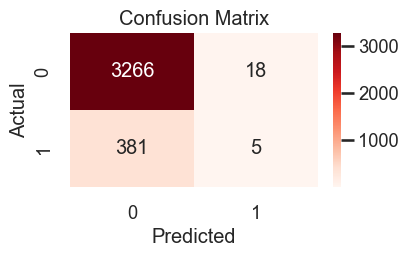

In [5]:
# Previsões no conjunto de teste
y_pred_completa_semcross = reglog_completa_semcross.predict(X_test_completa_semcross)

# Matriz de confusão
cm_completa_semcross = confusion_matrix(y_test_completa_semcross, y_pred_completa_semcross)

plt.figure(figsize=(4, 2))
sns.heatmap(cm_completa_semcross, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
X_completa = df_eventos_preprocessado.drop(columns=['Status'])
y_completa = df_eventos_preprocessado['Status']

reglog_completa_cross_3 = LogisticRegression(solver='lbfgs')

X_train_completa_cross_3, X_test_completa_cross_3, y_train_completa_cross_3, y_test_completa_cross_3 = train_test_split(X_completa, y_completa, test_size=0.2, random_state=1)

cv_result_3 = cross_val_score(reglog_completa_cross_3, X_train_completa_cross_3, y_train_completa_cross_3, cv=3, scoring='f1_weighted')

reglog_completa_cross_3.fit(X_train_completa_cross_3, y_train_completa_cross_3)

mean_cv_result_3 = cv_result_3.mean()

print("Validação Cruzada com 3 k-folds - F1 Score (média):", cv_result_3.mean())

Validação Cruzada com 3 k-folds - F1 Score (média): 0.8506864516392784


In [7]:
X_completa = df_eventos_preprocessado.drop(columns=['Status'])
y_completa = df_eventos_preprocessado['Status']

reglog_completa_cross_5 = LogisticRegression(solver='lbfgs')

X_train_completa_cross_5, X_test_completa_cross_5, y_train_completa_cross_5, y_test_completa_cross_5 = train_test_split(X_completa, y_completa, test_size=0.2, random_state=1)

cv_result_5 = cross_val_score(reglog_completa_cross_5, X_train_completa_cross_5, y_train_completa_cross_5, cv=5, scoring='f1_weighted')

reglog_completa_cross_5.fit(X_train_completa_cross_5, y_train_completa_cross_5)

mean_cv_result_5 = cv_result_5.mean()

print("Validação Cruzada com 5 k-folds - F1 Score (média):", cv_result_5.mean())

Validação Cruzada com 5 k-folds - F1 Score (média): 0.8512608516155724


In [8]:
resultados_todas_variaveis = pd.DataFrame({
    'Método': ['Sem Cross-Validation', 'Cross-Validation (3 folds)', 'Cross-Validation (5 folds)'],
    'Medida de desempenho': ['Acurácia', 'F1 Score médio', 'F1 Score médio'],
    'Resultado': [score_semcross, mean_cv_result_3, mean_cv_result_5]
})

with pd.option_context('display.float_format', '{:.6f}'.format):
    display(resultados_todas_variaveis)

,Método,Medida de desempenho,Resultado
0,Sem Cross-Validation,Acurácia,0.891281
1,Cross-Validation (3 folds),F1 Score médio,0.850686
2,Cross-Validation (5 folds),F1 Score médio,0.851261
